In [7]:
import os
import numpy as np
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [9]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
print('images.shape :', images.shape)

images.shape : (1, 70, 120, 1)


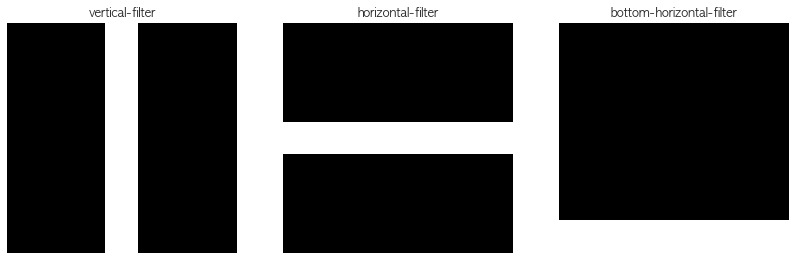

In [28]:
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[6, :, 0, 2] = 1

# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
pl_images = [
    fmap[:, :, 0, 0],  # vertical-filter
    fmap[:, :, 0, 1],  # horizontal-filter
    fmap[:, :, 0, 2],  # bottom-horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter', 'bottom-horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

In [29]:
fmap.shape

(7, 7, 1, 3)

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, 1])
filters = tf.constant(fmap)
conv = tf.nn.conv2d(X, filters, strides=[1, 1, 1, 1], padding="SAME")

with tf.Session() as sess:
    output = conv.eval(feed_dict={X: images})
    
print('output.shape :', output.shape)

output.shape : (1, 70, 120, 3)


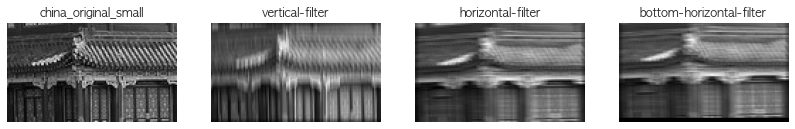

In [34]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 4, figsize=(14, 5))
pl_images = [
    images[0, :, :, 0],  # original
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
    output[0, :, :, 2],  # bottom-horizontal-filter
]

titles = ['china_original_small', 'vertical-filter', 'horizontal-filter', 'bottom-horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')